In [ ]:
# !pip install -q sparqlwrapper    #install SPARQLwrapper

In [1]:
from SPARQLWrapper import SPARQLWrapper, JSON, XML, N3, RDF
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
sparql = SPARQLWrapper("https://query.wikidata.org/sparql") #determine SPARQL endpoint

In [ ]:
sparql.setQuery("""SELECT ?atorLabel ?cidadaniaLabel ?nascimento WHERE {
  ?ator wdt:P106 wd:Q33999;
        wdt:P569 ?nascimento;
        rdfs:label ?atorLabel;
        wdt:P27 wd:Q30,
                ?cidadania.
  ?cidadania rdfs:label ?cidadaniaLabel . 
  FILTER(?cidadania != wd:Q30)
  FILTER((LANG(?atorLabel)) = "en")
  FILTER((LANG(?cidadaniaLabel)) = "en")
  FILTER(NOT EXISTS { ?ator wdt:P570 ?data_de_morte. })
}
ORDER BY (?atorLabel)""")
sparql.setReturnFormat(JSON)   # Return format is JSON
results = sparql.query().convert()   # execute SPARQL query and write result to "results"

In [ ]:
results

In [ ]:
results_df = pd.io.json.json_normalize(results['results']['bindings'])
results_df[['cidadaniaLabel.value','atorLabel.value','nascimento.value']].head()

In [ ]:
results_df[results_df['atorLabel.value'] == "Diana Terranova"]

In [ ]:
mask = ['cidadaniaLabel.value','atorLabel.value','nascimento.value']

In [ ]:
results_df[mask].dtypes
#.plot(kind="scatter", x="nascimento.value", y="cidadaniaLabel.value", figsize=(17,12), alpha=0.3)

In [2]:
def parse_date(date):
    date = date.upper()
    try:
        return datetime.strptime(date.split('T')[0],'%Y-%m-%d')
    except:
        print(date)
        return datetime.strptime('1986-05-12T00:00:00Z','%Y-%m-%dT%H:%M:%SZ')

In [ ]:
results_df['nascimento.value'] = results_df['nascimento.value'].apply(lambda x: 
                                                                    parse_date(x))

In [ ]:
results_df[results_df['atorLabel.value'] == "Diana Terranova"]

In [ ]:
parse_date(results_df['nascimento.value'].iloc[0])

In [ ]:
results_df.to_csv("Query_result.csv",index=False)

In [3]:
results_df = pd.read_csv("Query_result.csv")
results_df['nascimento.value'] = results_df['nascimento.value'].apply(lambda x: 
                                                                    parse_date(x))

In [4]:
results_df

,nascimento.datatype,nascimento.type,nascimento.value,atorLabel.xml:lang,atorLabel.type,atorLabel.value,cidadaniaLabel.xml:lang,cidadaniaLabel.type,cidadaniaLabel.value
0,http://www.w3.org/2001/XMLSchema#dateTime,literal,1967-10-09,en,literal,A.D. Calvo,en,literal,Argentina
1,http://www.w3.org/2001/XMLSchema#dateTime,literal,1982-03-07,en,literal,Aarón Díaz,en,literal,Mexico
2,http://www.w3.org/2001/XMLSchema#dateTime,literal,1966-06-25,en,literal,Aclan Bates,en,literal,Turkey
3,http://www.w3.org/2001/XMLSchema#dateTime,literal,1981-05-30,en,literal,Adam Bond,en,literal,United Kingdom
4,http://www.w3.org/2001/XMLSchema#dateTime,literal,1964-09-03,en,literal,Adam Curry,en,literal,Kingdom of the Netherlands
...,...,...,...,...,...,...,...,...,...
997,http://www.w3.org/2001/XMLSchema#dateTime,literal,1962-07-07,en,literal,Zhanna Aguzarova,en,literal,Russia
998,http://www.w3.org/2001/XMLSchema#dateTime,literal,1995-02-23,en,literal,Zion Moreno,en,literal,Mexico
999,http://www.w3.org/2001/XMLSchema#dateTime,literal,1979-05-29,en,literal,Zulay Henao,en,literal,Colombia
1000,http://www.w3.org/2001/XMLSchema#dateTime,literal,1966-12-16,en,literal,Álvaro Escobar,en,literal,Chile


In [5]:
results_df['cidadaniaLabel.value'].value_counts()

Canada                                 151
United Kingdom                         104
Soviet Union                            47
France                                  43
Australia                               35
                                      ... 
Turkish Republic of Northern Cyprus      1
State of Palestine                       1
Estonia                                  1
Overseas Citizenship of India            1
Hong Kong                                1
Name: cidadaniaLabel.value, Length: 114, dtype: int64

<AxesSubplot:xlabel='nascimento.value', ylabel='cidadaniaLabel.value'>

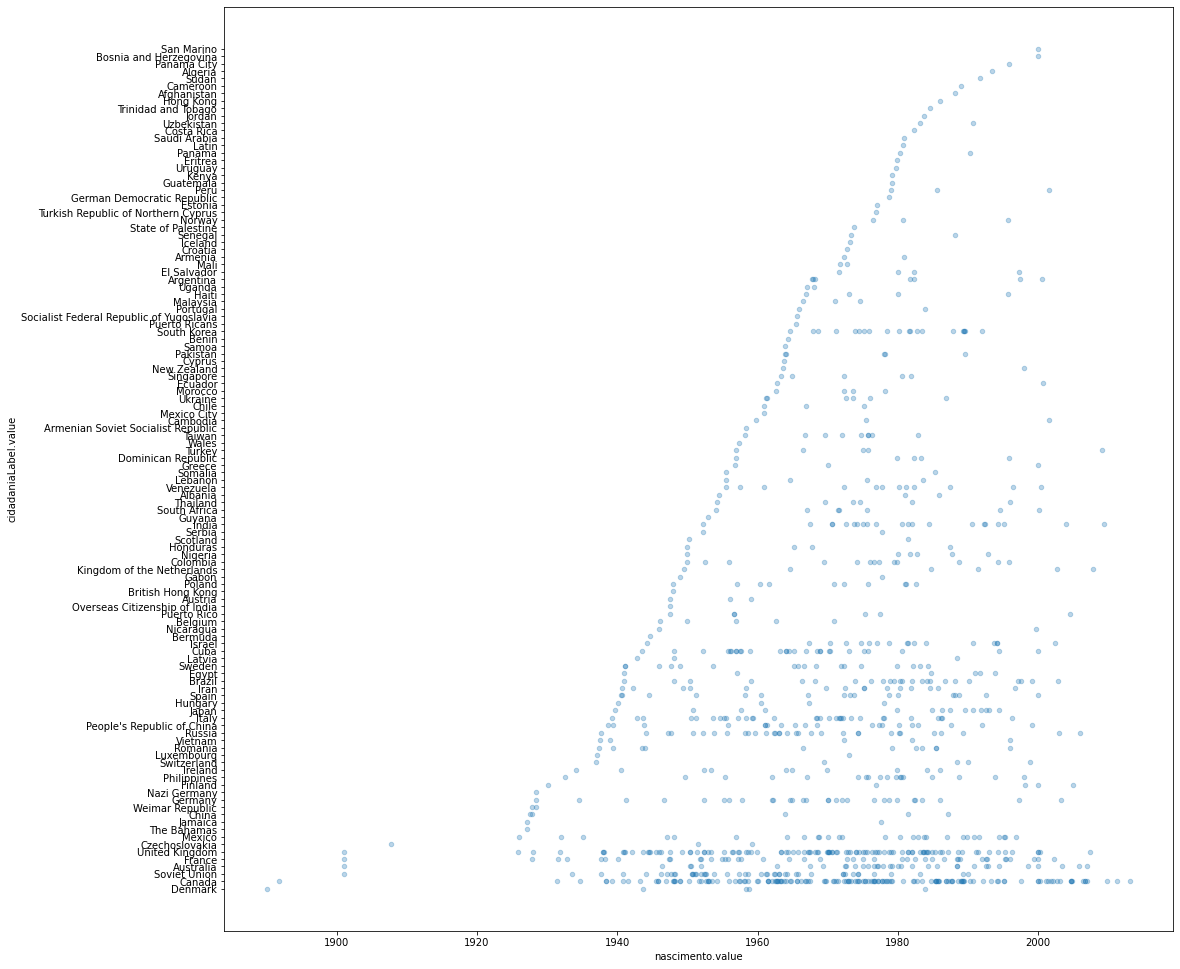

In [9]:
results_df.sort_values(by="nascimento.value",inplace=True)
results_df.plot(kind="scatter", x="nascimento.value", y="cidadaniaLabel.value", figsize=(17,17), alpha=0.3)

In [14]:
agg_data = results_df.groupby(by=[results_df["nascimento.value"].dt.year,"cidadaniaLabel.value"]).count()['atorLabel.value']
agg_data = agg_data.to_frame().reset_index(level=[0,1])

In [16]:
agg_data.columns

Index(['nascimento.value', 'cidadaniaLabel.value', 'atorLabel.value'], dtype='object')

## Resultados agregados por ano

<AxesSubplot:xlabel='nascimento.value', ylabel='cidadaniaLabel.value'>

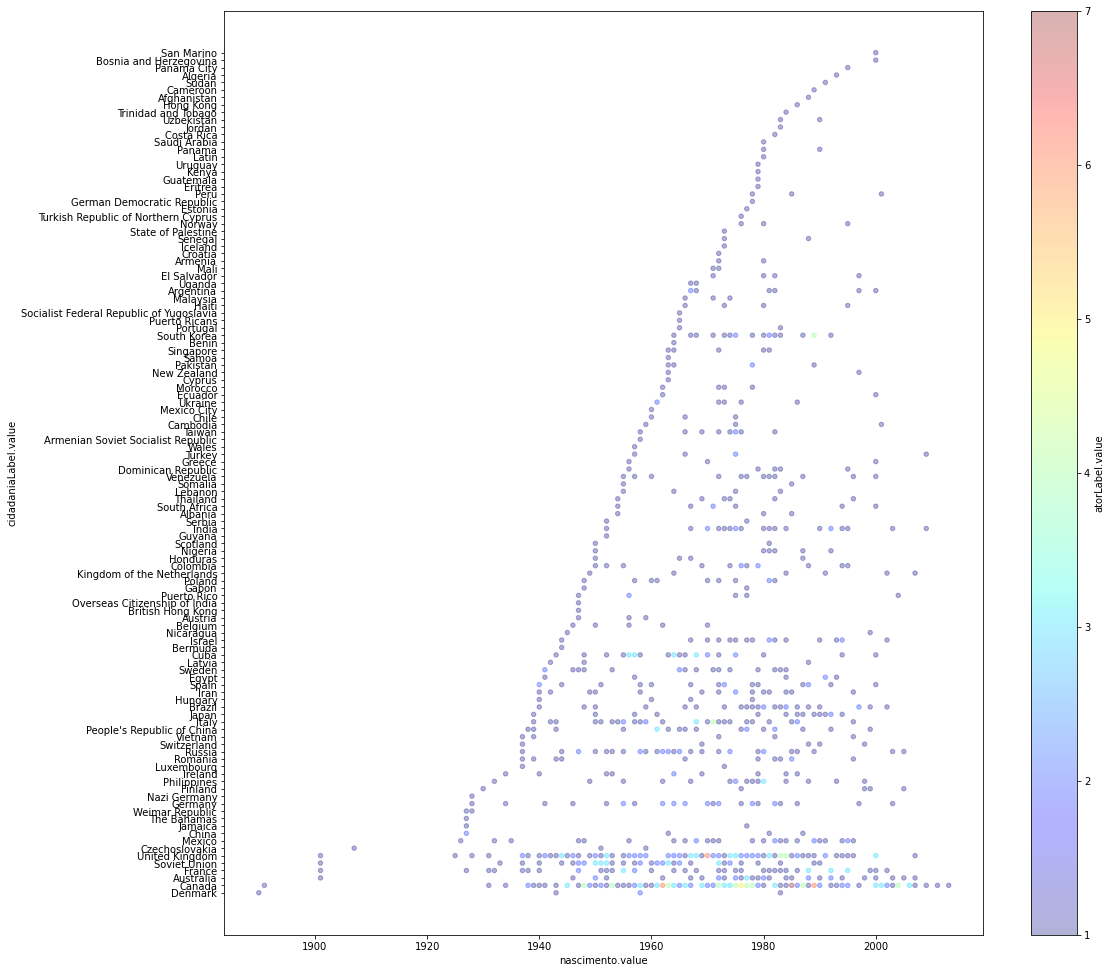

In [18]:
agg_data.plot(kind="scatter", x="nascimento.value", y="cidadaniaLabel.value", figsize=(17,17), alpha=0.3,c="atorLabel.value", cmap=plt.get_cmap("jet"), colorbar=True,
          sharex=False)

Vemos do gráfico acima que alguns países parecem ter gerado várias gerações de atores que conseguiram a cidadania Norte Americana, como é o caso do Canadá e Reino Unido. Além disso, a geração que mais gerou atores para ser aquela que nasceu entre 1960-1980.